# Imports
Import python libraries

In [1]:
import os

# Set dataset parameters
Choose the attributes to load the dataset.

In [2]:

detectors = ['mtcnn']  # 'dlib', 'opencv',
embedding_models = ['ArcFace']  # "Dlib", 'VGG-Face','FaceVACs', 'Facenet512'
# TODO:add quality models to experiments
quality_models = ['ser_fiq'] # , 'tface'


# Set LR parameters
Calibration, image filters, face filters, quality filters...

## Calibration

In [3]:
calibrators = ['logit', 'KDE']  # 'KDE', , 'isotonic'
calibration_db = ["LFW", "SCFace"] # which datasets using to calibrate
image_filters = []   # E.g. 'pose','gender'
face_image_filters = []  # 'confusion_score','quality'
quality_filters = [] # 'ser_fiq', 'tface'

n_calibration_pairs = 10000

## Validation

In [4]:
enfsi_years = [2011, 2015, 2017]

# Video parameters

In [5]:
quality_dropout = [0.01, 0.02, 0.05, 0.10, 0.20, 0.5, 1]

## Other parameters
Rest of the configuration

In [6]:
metrics = 'euclidean_l2'
embedding_model_as_scorer = True

# Scenarios
Different filters to do computations

In [7]:
scenario0 = []
scenario1 = ['gender', 'age']
scenario2 = ['yaw', 'pitch']
scenario3 = ['glasses', 'beard']
scenario4 = ['low_quality']
scenario5 = ['headgear']
scenario6 = ['terhorst_quality_rounded']

# Input and output directories
Where the sql database is and which folder the results are saved.

In [8]:
home = os.path.expanduser("~")

# SQL database path and name
input_dir = os.path.join(home, 'video_resources', 'sql_database')
db_name = 'colab_main_dataset'

# Where results are saved
output_dir = os.path.join(home, 'video_resources', 'exp_output')

# Preprocess data
Connect to sql database.

In [9]:
from sql_face.alchemy import get_session
from sql_face.tables import *

2022-12-30 19:28:56.826201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
session = get_session(input_dir, db_name)

# Experiments

All parameters are specified in ExperimentalSetup, that creates a different experiment with all the posible combinations of detectors, embedding_models, calibrators, etc.

In [11]:
from lr_video_face.experiments import ExperimentalSetup

In [12]:
experimental_setup = ExperimentalSetup(detectors, 
                                        embedding_models, 
                                        quality_models,
                                        calibrators, 
                                        calibration_db, 
                                        enfsi_years,
                                        image_filters, 
                                        face_image_filters, 
                                        metrics, 
                                        n_calibration_pairs,
                                        embedding_model_as_scorer,
                                        output_dir,
                                        session,
                                        quality_dropout)

# Results

In [13]:
#for exp in experimental_setup:
#    exp.perform()
#    break 

In [14]:
from lr_video_face.evaluators import GlobalEvaluator

In [15]:
global_results = GlobalEvaluator(experimental_setup)   

100%|██████████| 2/2 [04:15<00:00, 127.55s/it]


## Individual plots

ValueError: supplied range of [-0.6994672940456226, inf] is not finite

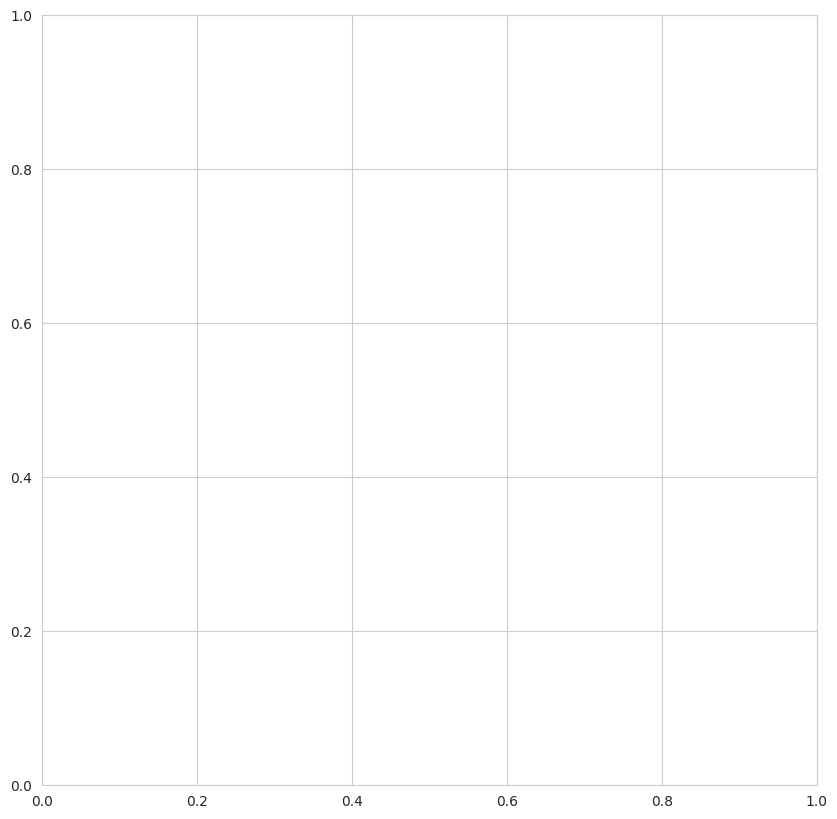

In [16]:
global_results.make_experiment_plots()

## General plot

In [ ]:
global_results.make_global_plot()